# Install

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


# Import all the necessary packages 

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.preprocessing import LabelEncoder

# Load dataset

In [3]:
data = pd.read_csv("car_evaluation.csv")

# Check dataset

In [4]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.shape

(1728, 7)

In [6]:
data.isnull().sum() # No null data

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [7]:
data.duplicated() # No duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

In [8]:
data.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
data.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [10]:
data.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [11]:
data.safety.unique()

array(['low', 'med', 'high'], dtype=object)

# Pre-processing

In [12]:
enc = LabelEncoder()
data.buying = enc.fit_transform(data.buying)
data.maint = enc.fit_transform(data.maint)
data.lug_boot = enc.fit_transform(data.lug_boot)
data.safety= enc.fit_transform(data.safety)

In [13]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


# Define x and y

In [14]:
x = data.iloc[:,[0, 1, 2, 3, 4, 5]]
y = data.outcome

# Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 1)

# Define model

In [16]:
model = DecisionTreeClassifier()

# Train

In [17]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

# Test

In [18]:
y_predict = model.predict(x_test)

In [19]:
accuracy_score(y_test, y_predict)

0.9691714836223507

In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         acc       0.93      0.95      0.94       111
        good       0.90      0.86      0.88        22
       unacc       0.99      0.98      0.99       368
       vgood       0.94      0.94      0.94        18

    accuracy                           0.97       519
   macro avg       0.94      0.93      0.94       519
weighted avg       0.97      0.97      0.97       519



In [21]:
confusion_matrix(y_test,y_predict)

array([[105,   1,   4,   1],
       [  2,  19,   1,   0],
       [  6,   0, 362,   0],
       [  0,   1,   0,  17]])

# Visualise the model 

In [22]:
node_data = StringIO()
export_graphviz(model, out_file = node_data)
graph = pydotplus.graph_from_dot_data(node_data.getvalue())

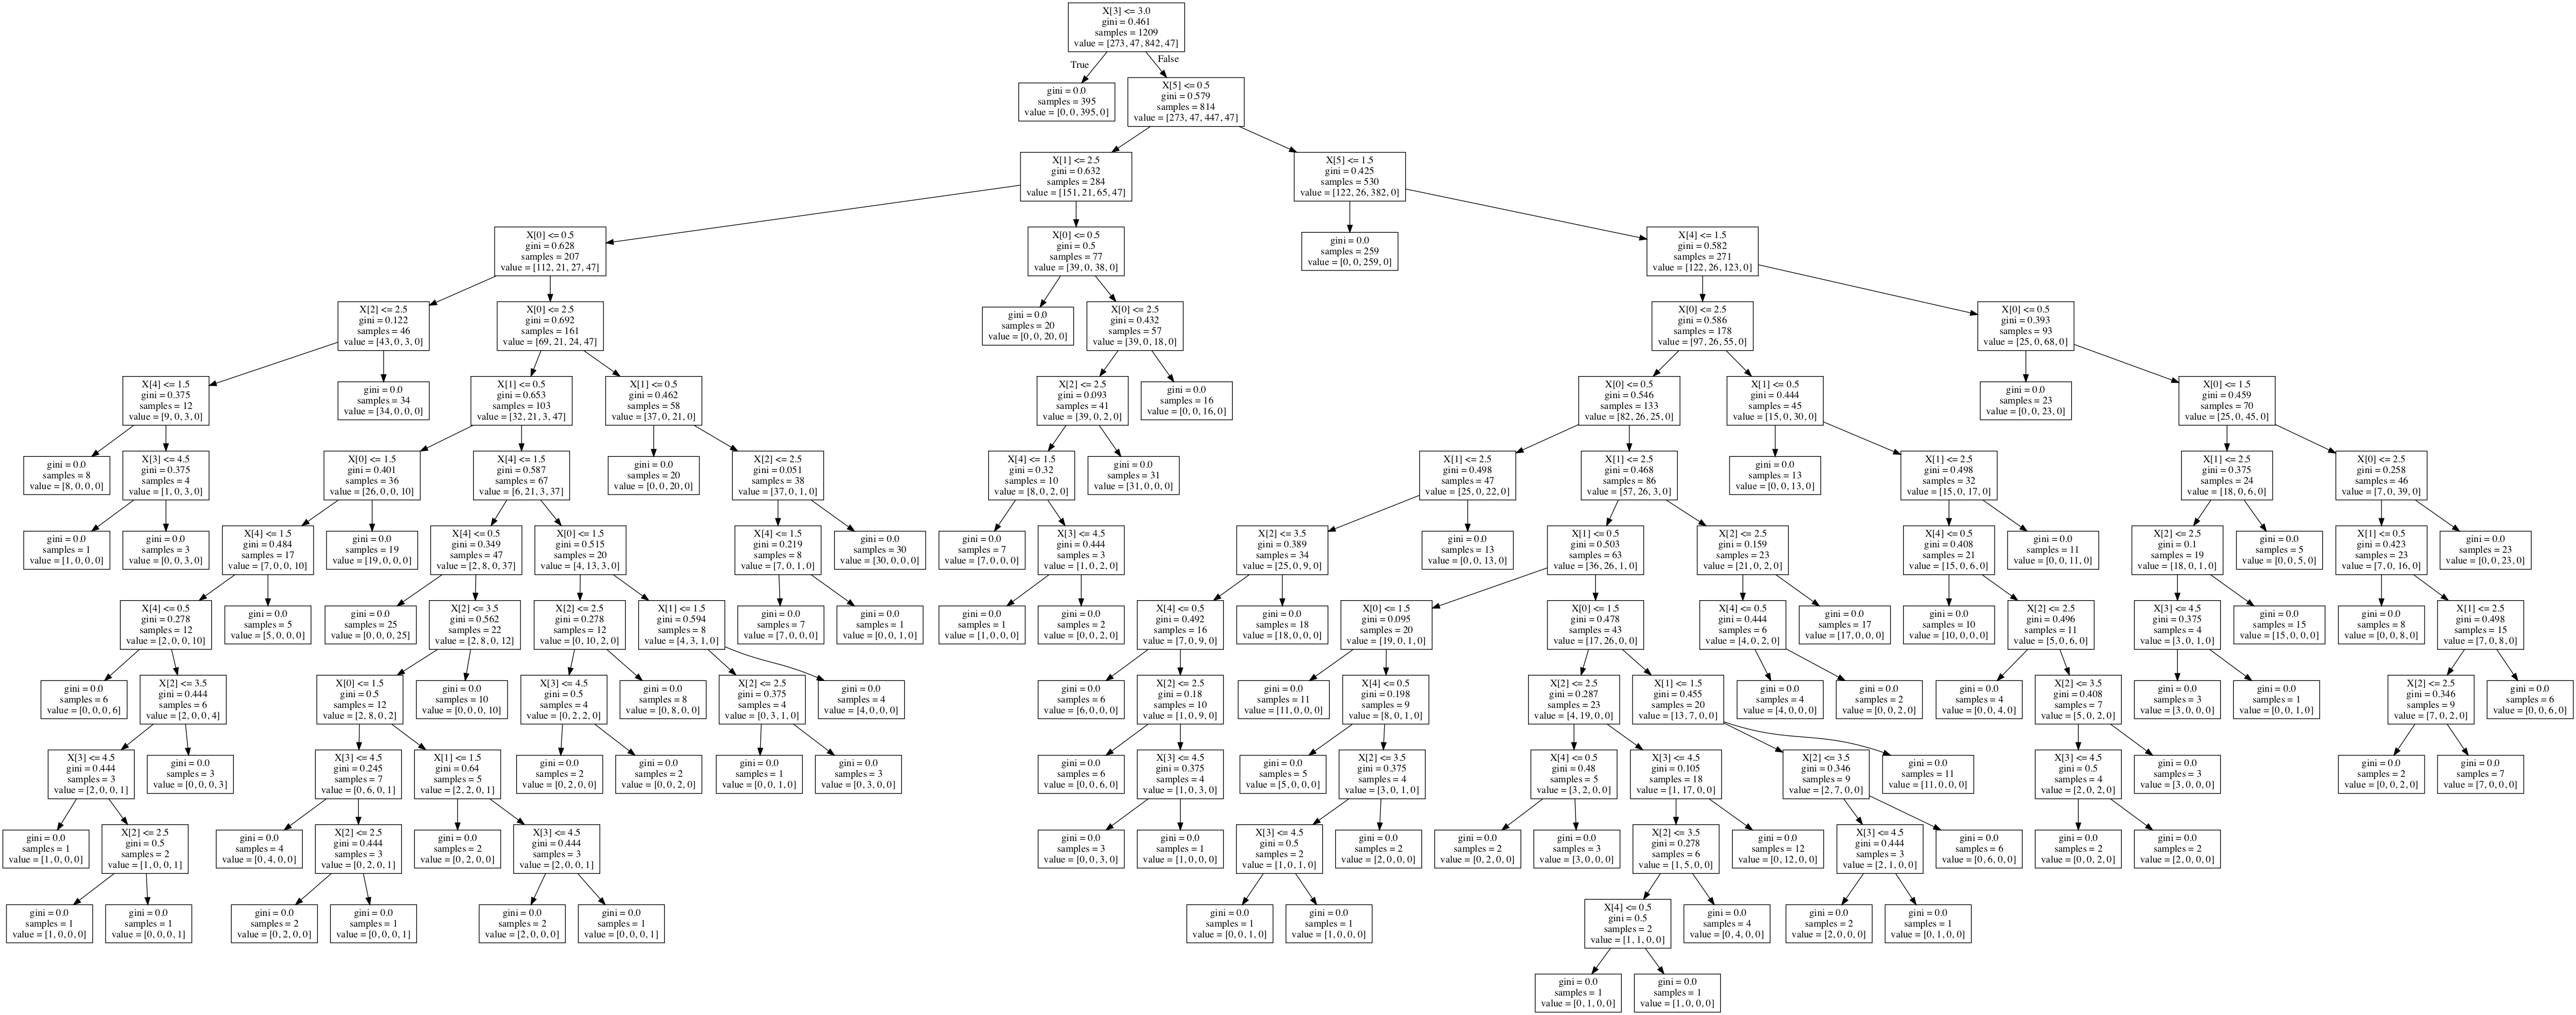

In [23]:
Image(graph.create_png())